# Contents
## Importing Libraries and Data (orders_products_all.pkl)
## Histogram of 'order_hour_of_day'
## Bar chart of 'loyalty_flag'
## Line chart of 'order_hour_of_day' v 'prices'
## Line chart of 'age' v 'number_of_dependents'
## Scatterplot of 'age' v 'income'
## Exporting visualizations

# Step 1: Importing Libraries and Data

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Turning project folder into a string

path = r'C:\Users\davau\OneDrive - College of the Sequoias\Career Foundry\Data Immersion\Achievement 4 (Python)\Instacart Basket Analysis'

In [4]:
# Importing orders_products_all.pkl

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [5]:
df.shape

(32404859, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 31 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   order_id                       int64  
 1   user_id                        int64  
 2   eval_set                       object 
 3   order_number                   int64  
 4   orders_day_of_week             int64  
 5   order_hour_of_day              int64  
 6   days_since_prior_order         float64
 7   product_id                     int64  
 8   add_to_cart_order              int64  
 9   reordered                      int64  
 10  product_name                   object 
 11  aisle_id                       int64  
 12  department_id                  int64  
 13  prices                         float64
 14  price_range_loc                object 
 15  busiest_day                    object 
 16  busiest_days                   object 
 17  busiest_period_of_day          object 
 18  

In [7]:
df.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,spending_flag,median_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,number_of_dependants,family_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


# Step 2: Follow the instructions in the Exercise

I have done this and saved the notebook as "Exercise 4.9", which I will include in the zipped folder with my submission.

# Step 3: Create a histogram of the 'order_hour_of_day' column

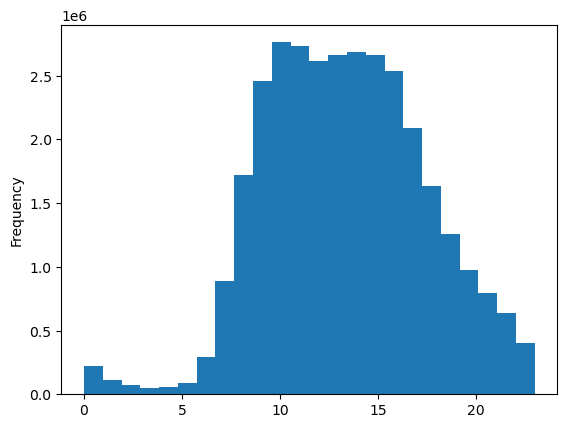

In [8]:
# Creating a histogram of the 'order_hour_of_day' column with 24 bins

busy_hour_hist = df['order_hour_of_day'].plot.hist(bins = 24)

As the title I've given this histogram suggests, this histogram shows what time of day customers are most likely to place orders.  We can see that the busiest time of day for placing orders is between 9am and 5pm, with the peak occurring at 10am and 11am (though orders remain elevated through the late morning and early afternoon). 

# Step 4: Create a bar chart from the 'loyalty_flag' column

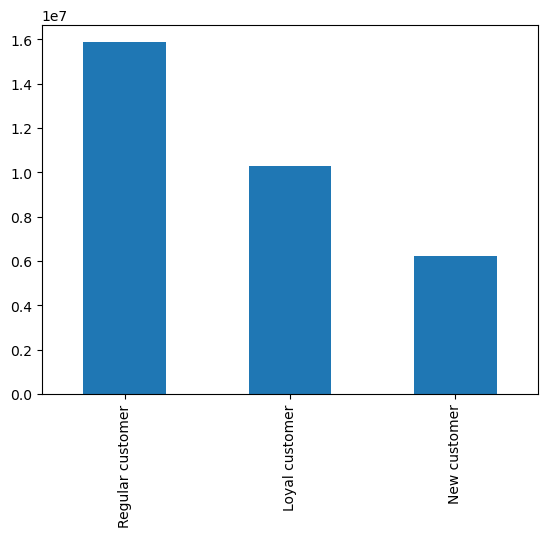

In [11]:
# Creating the bar chart

loyalty_bar = df['loyalty_flag'].value_counts().plot.bar()

# Step 5: Making a line chart to check if there's a difference in expenditure depending on hour of day

## Getting a random sample of the df

In [13]:
# Sets the seed for the random number generator below so that the list is reproducible
np.random.seed(4)

# Creates a new list called dev which assigns a value of True to every row whose assigned number is <=0.7 and False otherwise, thus producing a 70/30 split.
dev = np.random.rand(len(df)) <= 0.7

In [14]:
# Checking the list 'dev'

dev

array([False,  True, False, ...,  True,  True,  True])

In [15]:
# Store 70% of df as df_big

df_big = df[dev]

In [16]:
# Store remaining 30% of df as df_small

df_small = df[~dev]

In [17]:
# Checking the split

len(df)

32404859

In [18]:
len(df_big)+len(df_small)

32404859

## Making a line chart out of df_small comparing 'order_hour_of_day' and 'prices'

In [21]:
# Reducing df_small to only the columns we need

df_small_2 = df_small[['order_hour_of_day','prices']]

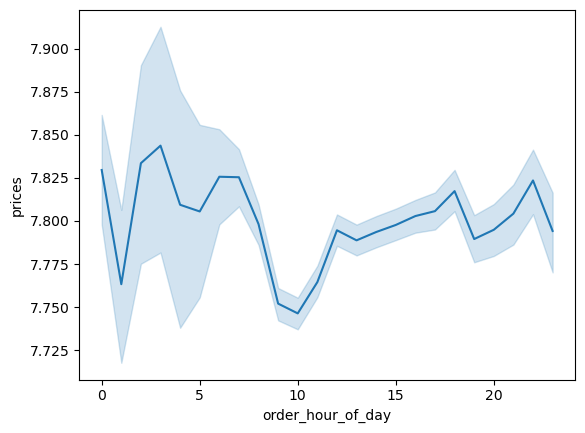

In [20]:
# Making the line chart

price_v_hour_line = sns.lineplot(data = df_small_2, x = 'order_hour_of_day',y = 'prices')

The items that customers tend to buy throughout the day are similarly priced; that is, customers do not tend to buy cheaper items at certain times of the day.  There does seem to be a slight dip in expenditure from, roughly, 8am to 11am, but overally, there is only about a 10 cent drop from peak to trough.

# Step 6: Making a line chart to check to see if there's a connection between 'age' and 'number_of_dependants'

In [22]:
# Reducing df_small to only the columns we need

df_small_3 = df_small[['age','number_of_dependants']]

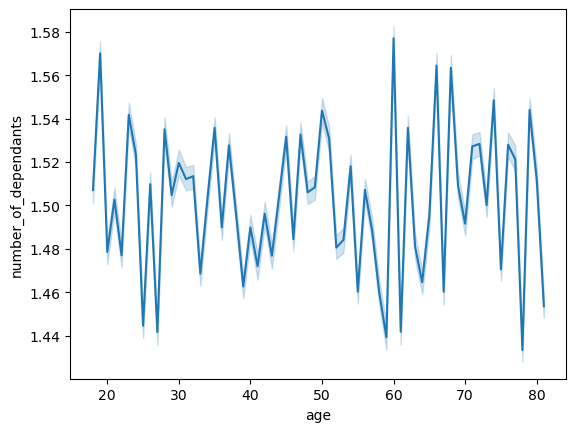

In [23]:
# Making the line chart

age_v_dependents_line = sns.lineplot(data = df_small_3, x = 'age',y = 'number_of_dependants')

The number of dependents (which I just realized I misspelled when I renamed that column) is strangely uniform with respect to age.  I expected to see more of a bell-shape, with the peak occurring around the 35-50 age group.  But this is not the case!

# Step 7: Making a scatterplot to see if there's a connection between 'age' and 'income'

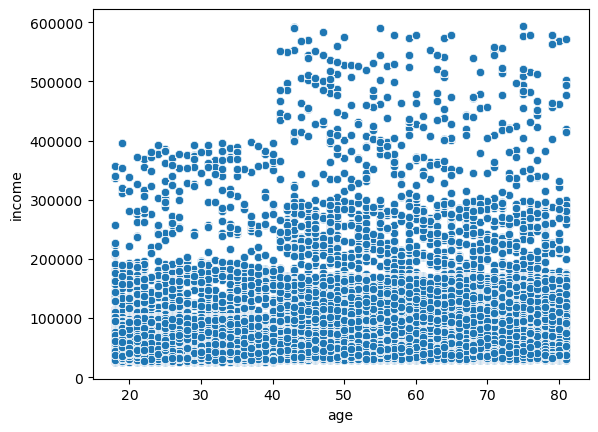

In [24]:
# Creating a scatterplot of 'income' v 'age'

income_v_age_scatter = sns.scatterplot(x = 'age', y = 'income',data = df)

This is a rather busy scatterplot.  I think the only trend that it shows somewhat clearly is that there's an abrupt jump in 'income' around age 40.  After that age, more people make between 200,000 and 300,000, and only after that age does anyone make over 400,000.

# Step 8: Exporting the visualizations

In [25]:
# Exporting busy_hour_hist

busy_hour_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'busy_hour_hist.png'))

In [27]:
# Exporting loyalty_bar

loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_bar.png'))

In [28]:
# Exporting price_v_hour_line

price_v_hour_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_v_hour_line.png'))

In [30]:
# Exporting income_v_age_scatter

income_v_age_scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_v_age_scatter.png'))